<center>Заметка 3. 	Бутстреп.</center>
<center>курса <q>Прикладной статистический анализ данных</q>.</center>

<b>Шаг 1: Создание повторных выборок ("псевдовыборок")</b>  

Создаем сотни новых выборок путем сэмплирования объектов с возвращением из исходной случайной выборки. Размер каждой повторной выборки совпадает с исходной случайной выборкой. В результате, каждый объект может встречаться один раз, более одного раза или вообще отсутствовать. 

<b>Шаг 2: Расчёт бутстреп распределения</b>   

Вычисляется статистика для каждой повторной выборки. Множество полученных статистик образует некоторое выборочное распределение и называется бутстреп-распределением.  

<b>Шаг 3: Применение бутстреп-распределение</b>  

Бутстреп-распределение дает информацию о форме, центре и разбросе выборочного распределения исследуемой статистики. С его помощью можно вычислять доверительные интервалы на данную статистику с произвольным уровнем значимости, а также проверять статистические гипотезы $H_0$, $H_1$.

<b>Основная идея</b>

- Повторные выборки из основной представляют то, что мы получили бы, если бы взяли большое количество выборок из популяции.

- Распределение статистики бутстрепа, основанное на множестве повторных выборок представляет собой выборочное распределение статистики, основанное на множестве истинных выборок.

## Bootstrap standart error

Если интересующая нас статистика является средним значением выборки $\bar{x}$, то стандартная ошибка бутстрепа, основанная на повторных выборках:

$$SE_{boot,\bar{x}}= \sqrt{\frac{1}{B-1}\sum\bigg(\bar{x}^* - \frac{1}{B}\sum\bar{x}^*\bigg)}$$
 
В этом выражении $\bar{x}^*$ представляет собой среднее значение отдельной повторной выборки. Стандартная ошибка бутстрепа -- это обычное стандартное отклонение значений $B$ в $\bar{x}^*$. Звездочка в $\bar{x}^*$ отличает среднее значение повторной выборки от среднего значения $\bar{x}$ исходной выборки.

## Распределение выборки и бутстреп распределение

<b>1. Параметрический метод</b>

Если мы знаем, что объекты из генеральной совокупности распределены нормально, то теория говорит нам, что выборочное распределение их среднего значения $\bar{x}$ также является нормальным.

![Теория](https://user-images.githubusercontent.com/60938140/74949302-a0aa1d80-540e-11ea-8f0c-73b6050fc7fd.png)

<b>2. Наивный метод</b>

Берём очень много истинных выборок, считаем среднее значение $\bar{x}$ для каждой истинной выборки и смотрим на распределение этих значений.

![Наивныйметод](https://user-images.githubusercontent.com/60938140/74949346-b28bc080-540e-11ea-86fb-e85f9a878c5a.png)

<b>3. Бутстреп</b>

Когда теория не работает, и мы можем позволить себе только одну истинную выборку, то эта истинная выборка заменяет генеральную совокупность. Тогда распределение $\bar{x}$ рассчитанное по множеству "псевдовыборок" заменяет распределение выборки.

![Бутстреп](https://user-images.githubusercontent.com/60938140/74949363-b91a3800-540e-11ea-8175-f1606d751cea.png)

# Расходы покупателей

Имеются размеры сумм в долларах, потраченных 50 покупателями в супермаркете. Мы готовы рассматривать это как SRS (Simple Random Sample) всех покупателей на этом рынке.     

In [1]:
spending = [3.11, 8.88, 9.26, 10.81, 12.69, 13.78, 15.23, 15.62, 17.00, 17.39,
            18.36, 18.43, 19.27, 19.50, 19.54, 20.16, 20.59, 22.22, 23.04, 24.47,
            24.58, 25.13, 26.24, 26.26, 27.65, 28.06, 28.08, 28.38, 32.03, 34.98,
            36.37, 38.64, 39.16, 41.02, 42.97, 44.08, 44.67, 45.40, 46.69, 48.65,
            50.39, 52.75, 54.80, 59.07, 61.22, 70.32, 82.70, 85.76, 86.37, 93.34]

1) Составьте гистограмму данных. Распределение слегка искажено.

(array([ 4., 13., 11.,  5.,  6.,  4.,  2.,  1.,  1.,  3.]),
 array([ 3.11 , 12.133, 21.156, 30.179, 39.202, 48.225, 57.248, 66.271,
        75.294, 84.317, 93.34 ]),
 <a list of 10 Patch objects>)

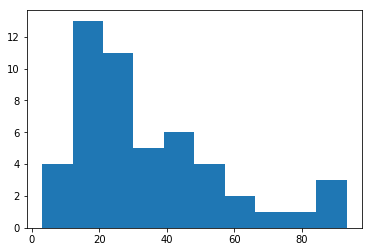

In [4]:
import matplotlib.pyplot as plt
plt.hist(spending)

2) Центральная предельная теорема говорит, что средние значения выборок будут группироваться вблизи среднего значения совокупности более плотно по мере увеличения размера каждой выборки. Распределение выборки примерно нормальное для n = 50? Чтобы выяснить это, воспользуйтесь бутстрепом и посмотрите среднее для полученного распределения.

In [23]:
from sklearn.utils import resample
import numpy as np
boot = resample(spending, replace=True, n_samples=100000, random_state=10)
print(np.mean(boot))
print(np.mean(spending))

34.5985705
34.7022


3) Сравните стандартные ошибки. 

У нас есть два способа оценить стандартное отклонение среднего значения выборки $\bar{x}$: использовать формулу $s\big/\sqrt{n}$ для стандартной ошибки или использовать bootstrap standart error. Найдите стандартное отклонение выборки $s$ и используйте его, чтобы найти стандартную ошибку $s\big/\sqrt{n}$ среднего значения выборки. Насколько ваш результат согласуется с bootstrap standart error?

In [27]:
boot = resample(spending, replace=True, n_samples=100000, random_state=10)
print(np.var(boot))
print(np.var(spending))

458.3336810395297
461.3615571600001


## Доверительный интервал

Вспомним односторонний доверительный интервал для среднего значения нормально распределеной совокупности:

$$\bar{x} \pm t^* \frac{s}{\sqrt{n}}$$

Этот интервал основан на нормальном распределении выборки со средним значением выборки $x$ и формулой для стандартной ошибки выборки $x$. Когда бутстреп распределение приблизительно нормальное и имеет небольшое смещение, мы можем использовать ту же самую формулу со стандартной ошибкой бутстрепа, чтобы получить доверительный интервал для любого параметра. 

Предположим, что бутстреп распределение статистики из SRS размера $n$ приблизительно нормально и мало смещено. Тогда аппроксимация доверительного интервала на любую статистику вычисляется через бутстреп:

$$statistic \pm t^*SE_{boot,statistic}$$

где $t^*$ - критическое значение $t(n-1)$ распределения с площадью между $-t^*$ и $t^*$.

4) Найдите 95% доверительный интервал для среднего $\mu$ генеральной совокупности, основываясь на ваших "псевдовыборках".  

5) Также найдите стандартный односторонний доверительный интервал. Он отличается от двухстороннего только используемыми стандартными ошибками. Насколько похожи интервалы?